# Import necessary libraries for data processing, visualization, and Google Trends extraction.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pytrends
from pytrends.request import TrendReq
from pytrends.request import TrendReq
import pandas as pd
import time


In [27]:
keyword_batches = [
    ["ambulance", "heat stroke"],
    ["breathing problems", "asthma attack"],
    ["air quality", "chest pain"],
    ["hospital wait time", "emergency room"]
]


# Loading different datasets

Define keyword batches for Google Trends queries. Each batch groups related search terms to avoid API limits and improve data collection quality.


In [28]:
pytrends = TrendReq(hl='en-US', tz=360)

def get_trends(start, end, kw):
    timeframe = f"{start} {end}"
    pytrends.build_payload(
        kw_list=kw,
        timeframe=timeframe,
        geo="CA-ON"
    )
    df = pytrends.interest_over_time()
    df = df.drop(columns=["isPartial"], errors="ignore")
    return df


1.   Initialize the Google Trends client and define a helper function to fetch trend data for a given date range and keyword list (Ontario region)
2.   This function returns a cleaned time-series dataframe for each batch of search terms.




In [29]:
all_results = []

segments = [
    ("2014-01-01", "2018-12-31"),
    ("2019-01-01", "2022-12-31"),
    ("2023-01-01", "2025-12-01")
]

for kw in keyword_batches:
    for start, end in segments:
        print(f"Downloading {kw} from {start} to {end} ...")
        try:
            df = get_trends(start, end, kw)
            df["kw_group"] = "_".join(kw)
            all_results.append(df)
            time.sleep(2)   # REQUIRED — prevents 429/400 issues
        except Exception as e:
            print("FAILED:", kw, start, end, e)


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Loop through each keyword batch and date range to download Google Trends data.
Data is collected in smaller segments to avoid API errors and rate limits.
Each result is stored in a list, and a short delay is used to prevent request throttling.

In [82]:
gt = pd.concat(all_results)
gt = gt.sort_index()
gt.to_csv("google_trends_2014_2025_clean.csv")


Combine all downloaded Google Trends segments into a single dataframe, sort them by date, and save the final cleaned dataset for later analysis.

In [97]:
climate = pd.read_csv("/content/sample_data/toronto-downtown, ontario-air-quality.csv")
airq = pd.read_csv("/content/sample_data/weatherstats_toronto_daily.csv")

/tmp/ipython-input-1106957403.py:2: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  airq = pd.read_csv("/content/sample_data/weatherstats_toronto_daily.csv")


Load the climate and air quality datasets from local CSV files. The data was sourced from the Ontario government open data portal and an open-source AQI database.

In [98]:
climate["date"] = pd.to_datetime(climate["date"])
airq["date"] = pd.to_datetime(airq["date"])


In [99]:
climate.columns = climate.columns.str.strip()
for col in ["pm25", "o3", "no2", "so2", "co"]:
    climate[col] = pd.to_numeric(climate[col], errors="coerce")

In [100]:
airq = airq.fillna(method="ffill").fillna(method="bfill")


/tmp/ipython-input-3208146536.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  airq = airq.fillna(method="ffill").fillna(method="bfill")


In [102]:
df = pd.merge(climate, airq, on="date", how="inner")


Merging all the different sheets into one

In [103]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 77 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           4181 non-null   datetime64[ns]
 1   pm25                           4159 non-null   float64       
 2   o3                             4161 non-null   float64       
 3   no2                            4156 non-null   float64       
 4   so2                            208 non-null    float64       
 5   co                             1515 non-null   float64       
 6   max_temperature                4181 non-null   float64       
 7   avg_hourly_temperature         4181 non-null   float64       
 8   avg_temperature                4181 non-null   float64       
 9   min_temperature                4181 non-null   float64       
 10  max_humidex                    4181 non-null   float64       
 11  min_windchill    

,date,pm25,o3,no2,so2,co,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2025-07-02,52.0,34.0,12.0,NaN,NaN,31.4,24.82,24.29,17.2,...,NaN,NaN,7.0,3.1,3.5,0.0,NaN,NaN,NaN,NaN
1,2025-07-03,36.0,27.0,8.0,NaN,NaN,27.7,22.62,21.75,15.8,...,NaN,NaN,7.0,3.0,3.5,0.0,NaN,NaN,NaN,NaN
2,2025-07-04,41.0,32.0,8.0,NaN,NaN,26.5,21.07,20.14,13.8,...,NaN,NaN,6.0,2.1,3.0,0.0,NaN,NaN,NaN,NaN
3,2025-07-05,41.0,37.0,15.0,NaN,NaN,30.4,24.88,24.90,19.4,...,NaN,NaN,8.0,4.1,4.0,0.0,NaN,NaN,NaN,NaN
4,2025-07-06,97.0,36.0,8.0,NaN,NaN,34.5,29.09,28.50,22.5,...,NaN,NaN,6.0,3.0,3.5,1.0,NaN,NaN,NaN,NaN


In [104]:
df["day_of_week"] = df["date"].dt.dayofweek
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["week"] = df["date"].dt.isocalendar().week
df["season"] = df["month"] % 12 // 3  # winter=0, spring=1, etc.
df.head()

,date,pm25,o3,no2,so2,co,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,...,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10,day_of_week,month,year,week,season
0,2025-07-02,52.0,34.0,12.0,NaN,NaN,31.4,24.82,24.29,17.2,...,0.0,NaN,NaN,NaN,NaN,2,7,2025,27,2
1,2025-07-03,36.0,27.0,8.0,NaN,NaN,27.7,22.62,21.75,15.8,...,0.0,NaN,NaN,NaN,NaN,3,7,2025,27,2
2,2025-07-04,41.0,32.0,8.0,NaN,NaN,26.5,21.07,20.14,13.8,...,0.0,NaN,NaN,NaN,NaN,4,7,2025,27,2
3,2025-07-05,41.0,37.0,15.0,NaN,NaN,30.4,24.88,24.90,19.4,...,0.0,NaN,NaN,NaN,NaN,5,7,2025,27,2
4,2025-07-06,97.0,36.0,8.0,NaN,NaN,34.5,29.09,28.50,22.5,...,1.0,NaN,NaN,NaN,NaN,6,7,2025,27,2


In [105]:
df["heat_stress"] = df["max_temperature"] * df["max_humidex"]
df["cold_stress"] = df["min_windchill"] * df["min_temperature"]
df.head()

,date,pm25,o3,no2,so2,co,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,...,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10,day_of_week,month,year,week,season,heat_stress,cold_stress
0,2025-07-02,52.0,34.0,12.0,NaN,NaN,31.4,24.82,24.29,17.2,...,NaN,NaN,NaN,2,7,2025,27,2,1099.0,-120.4
1,2025-07-03,36.0,27.0,8.0,NaN,NaN,27.7,22.62,21.75,15.8,...,NaN,NaN,NaN,3,7,2025,27,2,775.6,-110.6
2,2025-07-04,41.0,32.0,8.0,NaN,NaN,26.5,21.07,20.14,13.8,...,NaN,NaN,NaN,4,7,2025,27,2,715.5,-96.6
3,2025-07-05,41.0,37.0,15.0,NaN,NaN,30.4,24.88,24.90,19.4,...,NaN,NaN,NaN,5,7,2025,27,2,1124.8,-135.8
4,2025-07-06,97.0,36.0,8.0,NaN,NaN,34.5,29.09,28.50,22.5,...,NaN,NaN,NaN,6,7,2025,27,2,1380.0,-157.5


In [106]:
df["pollution_index"] = (
    df["pm25"] * 0.5 +
    df["o3"] * 0.2 +
    df["no2"] * 0.2 +
    df["so2"] * 0.05 +
    df["co"] * 0.05
)
df.head()

,date,pm25,o3,no2,so2,co,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,...,avg_cloud_cover_10,min_cloud_cover_10,day_of_week,month,year,week,season,heat_stress,cold_stress,pollution_index
0,2025-07-02,52.0,34.0,12.0,NaN,NaN,31.4,24.82,24.29,17.2,...,NaN,NaN,2,7,2025,27,2,1099.0,-120.4,NaN
1,2025-07-03,36.0,27.0,8.0,NaN,NaN,27.7,22.62,21.75,15.8,...,NaN,NaN,3,7,2025,27,2,775.6,-110.6,NaN
2,2025-07-04,41.0,32.0,8.0,NaN,NaN,26.5,21.07,20.14,13.8,...,NaN,NaN,4,7,2025,27,2,715.5,-96.6,NaN
3,2025-07-05,41.0,37.0,15.0,NaN,NaN,30.4,24.88,24.90,19.4,...,NaN,NaN,5,7,2025,27,2,1124.8,-135.8,NaN
4,2025-07-06,97.0,36.0,8.0,NaN,NaN,34.5,29.09,28.50,22.5,...,NaN,NaN,6,7,2025,27,2,1380.0,-157.5,NaN


In [107]:
df["is_heatwave"] = (df["max_temperature"] > 28).astype(int)
df["is_coldwave"] = (df["min_temperature"] < -10).astype(int)
df["heavy_rain"] = (df["rain"] > 10).astype(int)
df["snow_event"] = (df["snow"] > 5).astype(int)
df["poor_visibility"] = (df["min_visibility"] < 2).astype(int)
df.head()

,date,pm25,o3,no2,so2,co,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,...,week,season,heat_stress,cold_stress,pollution_index,is_heatwave,is_coldwave,heavy_rain,snow_event,poor_visibility
0,2025-07-02,52.0,34.0,12.0,NaN,NaN,31.4,24.82,24.29,17.2,...,27,2,1099.0,-120.4,NaN,1,0,0,0,0
1,2025-07-03,36.0,27.0,8.0,NaN,NaN,27.7,22.62,21.75,15.8,...,27,2,775.6,-110.6,NaN,0,0,0,0,0
2,2025-07-04,41.0,32.0,8.0,NaN,NaN,26.5,21.07,20.14,13.8,...,27,2,715.5,-96.6,NaN,0,0,0,0,0
3,2025-07-05,41.0,37.0,15.0,NaN,NaN,30.4,24.88,24.90,19.4,...,27,2,1124.8,-135.8,NaN,1,0,0,0,0
4,2025-07-06,97.0,36.0,8.0,NaN,NaN,34.5,29.09,28.50,22.5,...,27,2,1380.0,-157.5,NaN,1,0,0,0,0


In [108]:
for col in ["pm25", "o3", "no2", "so2", "co", "max_temperature"]:
    df[col+"_lag1"] = df[col].shift(1)
    df[col+"_lag3"] = df[col].shift(3)
df.head()

,date,pm25,o3,no2,so2,co,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,...,o3_lag1,o3_lag3,no2_lag1,no2_lag3,so2_lag1,so2_lag3,co_lag1,co_lag3,max_temperature_lag1,max_temperature_lag3
0,2025-07-02,52.0,34.0,12.0,NaN,NaN,31.4,24.82,24.29,17.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-07-03,36.0,27.0,8.0,NaN,NaN,27.7,22.62,21.75,15.8,...,34.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,31.4,NaN
2,2025-07-04,41.0,32.0,8.0,NaN,NaN,26.5,21.07,20.14,13.8,...,27.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,27.7,NaN
3,2025-07-05,41.0,37.0,15.0,NaN,NaN,30.4,24.88,24.90,19.4,...,32.0,34.0,8.0,12.0,NaN,NaN,NaN,NaN,26.5,31.4
4,2025-07-06,97.0,36.0,8.0,NaN,NaN,34.5,29.09,28.50,22.5,...,37.0,27.0,15.0,8.0,NaN,NaN,NaN,NaN,30.4,27.7


In [109]:
rolling_cols = ["pm25", "o3", "no2", "so2", "co", "max_temperature"]

for col in rolling_cols:
    df[col+"_roll3"] = df[col].rolling(3).mean()
    df[col+"_roll7"] = df[col].rolling(7).mean()
df.head()

,date,pm25,o3,no2,so2,co,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,...,o3_roll3,o3_roll7,no2_roll3,no2_roll7,so2_roll3,so2_roll7,co_roll3,co_roll7,max_temperature_roll3,max_temperature_roll7
0,2025-07-02,52.0,34.0,12.0,NaN,NaN,31.4,24.82,24.29,17.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-07-03,36.0,27.0,8.0,NaN,NaN,27.7,22.62,21.75,15.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-07-04,41.0,32.0,8.0,NaN,NaN,26.5,21.07,20.14,13.8,...,31.0,NaN,9.333333,NaN,NaN,NaN,NaN,NaN,28.533333,NaN
3,2025-07-05,41.0,37.0,15.0,NaN,NaN,30.4,24.88,24.90,19.4,...,32.0,NaN,10.333333,NaN,NaN,NaN,NaN,NaN,28.200000,NaN
4,2025-07-06,97.0,36.0,8.0,NaN,NaN,34.5,29.09,28.50,22.5,...,35.0,NaN,10.333333,NaN,NaN,NaN,NaN,NaN,30.466667,NaN


In [110]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Columns: 114 entries, date to max_temperature_roll7
dtypes: UInt32(1), datetime64[ns](1), float64(101), int32(4), int64(5), object(2)
memory usage: 3.6+ MB


,0
date,0
pm25,22
o3,20
no2,25
so2,3973
...,...
so2_roll7,4177
co_roll3,2698
co_roll7,2751
max_temperature_roll3,2


In [37]:
date_range = pd.date_range(start='2014-01-01', end='2025-12-01', freq='W')

np.random.seed(42)

ems_calls = pd.DataFrame({
    "date": date_range,
    "ems_calls": np.random.poisson(lam=80, size=len(date_range))
                 + np.random.normal(0, 5, len(date_range))
})

ems_calls["date"] = pd.to_datetime(ems_calls["date"])
ems_calls = ems_calls.set_index("date")
ems_calls.head()
ems_calls.to_csv("ems.csv") # Changed from df.to_csv to ems_calls.to_csv, which saves the index ('date') as a column.

In [38]:
climate = pd.read_csv("/content/toronto_climate_airq_merged.csv")
trends = pd.read_csv("/content/google_trends_2014_2025_clean.csv")
ems = pd.read_csv("/content/ems.csv")

In [39]:
climate["date"] = pd.to_datetime(climate["date"])
trends["date"] = pd.to_datetime(trends["date"])
ems["date"] = pd.to_datetime(ems["date"])


In [41]:
if "date" not in trends.columns:
    trends = trends.reset_index().rename(columns={"index": "date"})



In [115]:
df = climate.merge(ems, on="date", how="inner")
print("df columns after merging climate and ems:", df.columns.tolist())

df columns after merging climate and ems: ['date', 'pm25', 'o3', 'no2', 'so2', 'co', 'ems_calls']


In [118]:
df = df.dropna(subset=["ems_calls"]).reset_index(drop=True)
df.to_csv("climate_toronto.csv", index=False)

In [119]:
climate = pd.read_csv("climate_toronto.csv")
print(climate.shape)
print(climate.head(3))
print(climate.isna().sum())


(617, 7)
         date  pm25    o3   no2  so2  co  ems_calls
0  2025-11-02  21.0  14.0  16.0  NaN NaN  96.764373
1  2025-11-16  44.0  20.0   6.0  NaN NaN  98.574572
2  2025-11-23  23.0   NaN   NaN  NaN NaN  83.199823
date           0
pm25           5
o3             3
no2            6
so2          583
co           403
ems_calls      0
dtype: int64


In [44]:

trend_columns = [col for col in trends.columns if col not in ['date', 'kw_group']]

trends_aggregated = trends.groupby("date")[trend_columns].max()

trends_daily = trends_aggregated.resample("D").ffill().reset_index()

In [45]:
df = df.merge(trends_daily, on="date", how="left")


In [46]:
df = df.dropna().reset_index(drop=True)


In [47]:
df.to_csv("toronto_final_merged_dataset.csv", index=False)


# Exploratory Data Analysis

In [137]:
import pandas as pd

# -----------------------------
# STEP 1 — LOAD EMS & AQI
# -----------------------------
ems = pd.read_csv("/content/ems.csv")
aqi = pd.read_csv("/content/sample_data/toronto-downtown, ontario-air-quality.csv")

# Convert dates to datetime
ems["date"] = pd.to_datetime(ems["date"], errors="coerce").dt.normalize()
aqi["date"] = pd.to_datetime(aqi["date"], errors="coerce").dt.normalize()

# Strip column names and convert pollution columns to numeric, coercing errors to NaN
aqi.columns = aqi.columns.str.strip()
for col in ["pm25", "o3", "no2", "so2", "co"]:
    aqi[col] = pd.to_numeric(aqi[col], errors="coerce")

# -----------------------------
# STEP 2 — MERGE ON DATE
# -----------------------------
# Use EMS as base (so you keep all EMS rows even if AQI missing)
ems_aqi = ems.merge(aqi, on="date", how="left")

# -----------------------------
# STEP 3 — HANDLE MISSING AQI VALUES
# -----------------------------
# Fill missing AQI values using forward/backward fill
ems_aqi = ems_aqi.fillna(method="ffill").fillna(method="bfill")

# -----------------------------
# STEP 4 — CHECK RESULT
# -----------------------------
print("Merged EMS + AQI shape:", ems_aqi.shape)
print(ems_aqi.head())
print(ems_aqi.isna().sum())

# -----------------------------
# STEP 5 — SAVE MERGED CSV (optional)
# -----------------------------
ems_aqi.to_csv("ems_aqi_merged.csv", index=False)
print("Merged EMS + AQI saved as 'ems_aqi_merged.csv'")

Merged EMS + AQI shape: (622, 7)
        date  ems_calls  pm25    o3   no2  so2   co
0 2014-01-05  75.512182  29.0  19.0  15.0  1.0  2.0
1 2014-01-12  92.878534  35.0  21.0   8.0  1.0  2.0
2 2014-01-19  69.249722  55.0  21.0  11.0  1.0  2.0
3 2014-01-26  83.627882  27.0  27.0  11.0  1.0  2.0
4 2014-02-02  89.134641  71.0  27.0  13.0  1.0  2.0
date         0
ems_calls    0
pm25         0
o3           0
no2          0
so2          0
co           0
dtype: int64
Merged EMS + AQI saved as 'ems_aqi_merged.csv'


/tmp/ipython-input-3509895710.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ems_aqi = ems_aqi.fillna(method="ffill").fillna(method="bfill")


/tmp/ipython-input-366984393.py:13: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  climate = pd.read_csv("/content/sample_data/weatherstats_toronto_daily.csv")
/tmp/ipython-input-366984393.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


Final dataset shape: (4211, 86)
        date  max_temperature  avg_hourly_temperature  avg_temperature  \
0 2025-07-16             32.4                   26.64            26.25   
1 2025-07-15             31.9                   26.37            25.40   
2 2025-07-14             29.6                   25.40            25.75   
3 2025-07-13             31.6                   26.59            26.25   
4 2025-07-12             33.7                   28.11            28.15   

   min_temperature  max_humidex  min_windchill  max_relative_humidity  \
0             20.1         39.0           -7.0                   82.0   
1             18.9         36.0           -7.0                   75.0   
2             21.9         34.0           -7.0                   64.0   
3             20.9         39.0           -7.0                   97.0   
4             22.6         41.0           -7.0                   86.0   

   avg_hourly_relative_humidity  avg_relative_humidity  ...  so2   co  \
0          

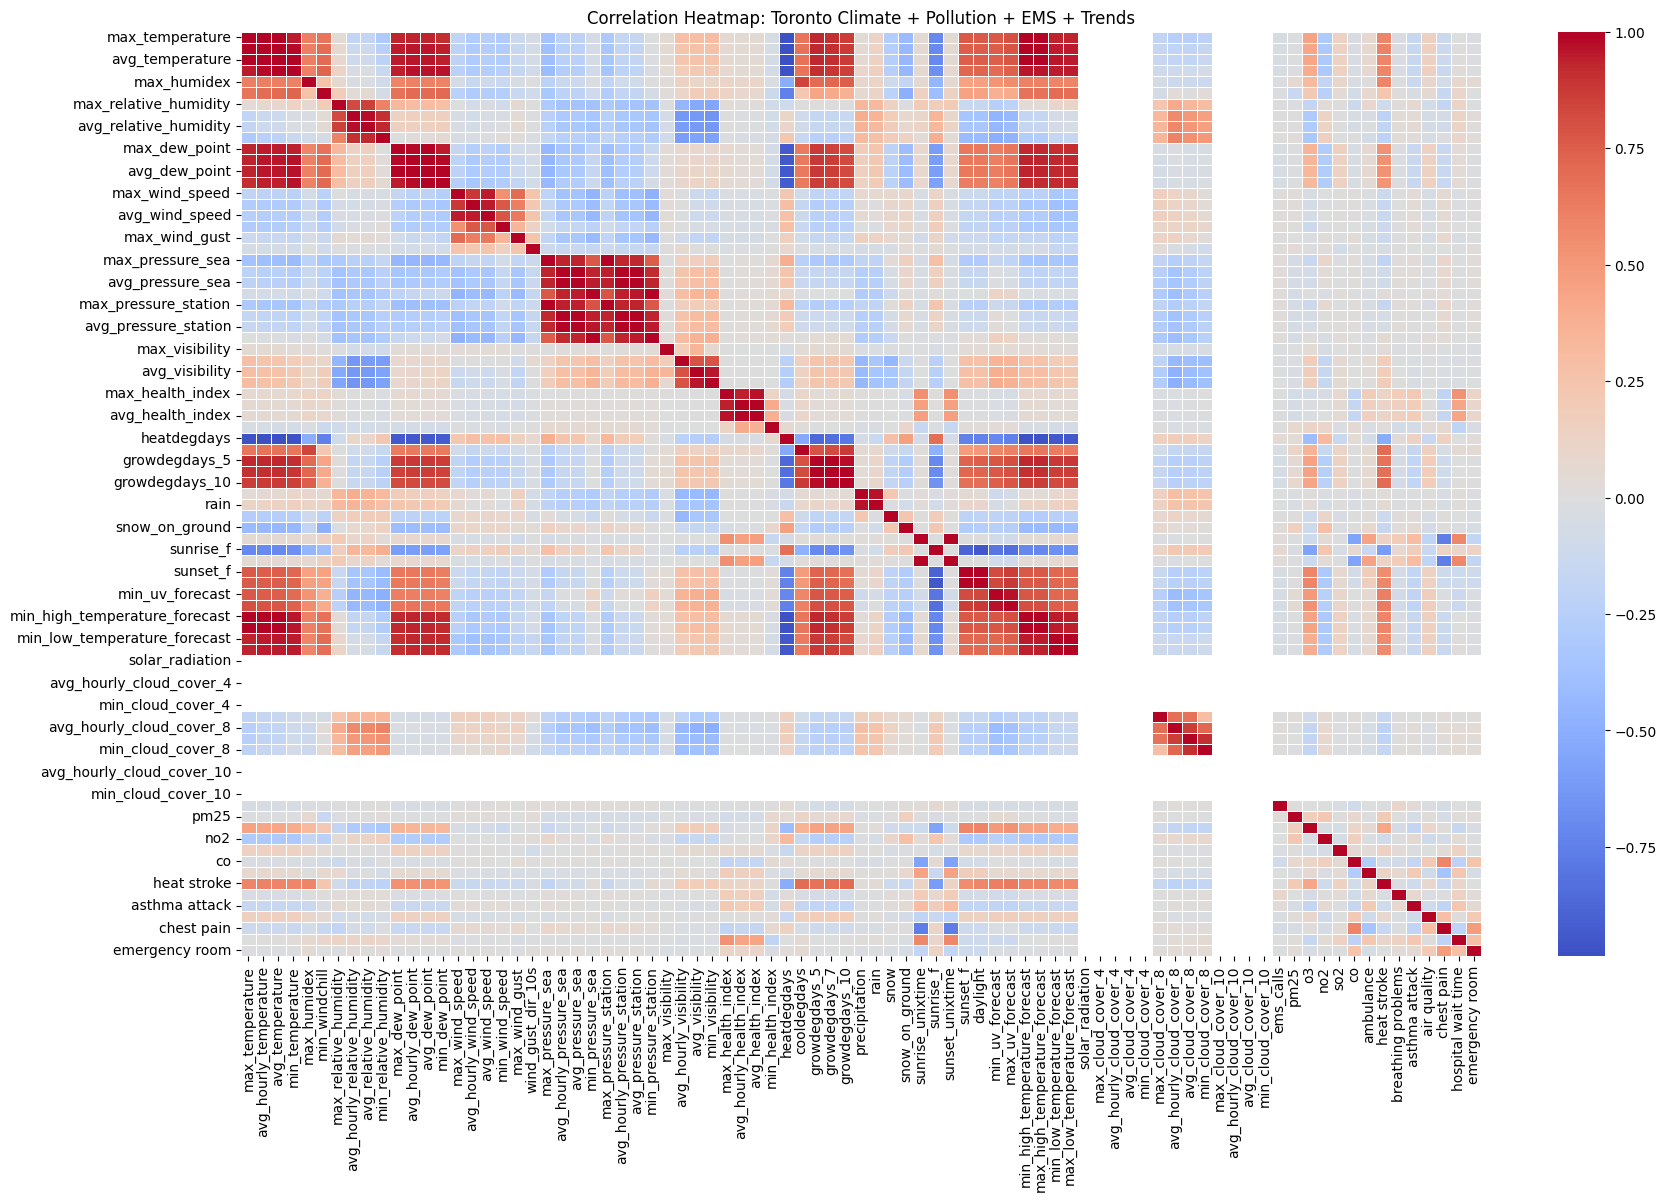

Final merged dataset saved as 'toronto_final_merged_dataset.csv'


In [138]:

climate = pd.read_csv("/content/sample_data/weatherstats_toronto_daily.csv")
climate["date"] = pd.to_datetime(climate["date"], errors="coerce").dt.normalize()
climate.columns = climate.columns.str.strip() # Strip column names


pollution_ems = pd.read_csv("/content/ems_aqi_merged.csv")
pollution_ems["date"] = pd.to_datetime(pollution_ems["date"], errors="coerce").dt.normalize()
pollution_ems.columns = pollution_ems.columns.str.strip() # Strip column names


trends = pd.read_csv("/content/google_trends_2014_2025_clean.csv")
trends["date"] = pd.to_datetime(trends["date"], errors="coerce").dt.normalize()
trends.columns = trends.columns.str.strip() # Strip column names

pollution_ems_daily = pollution_ems.set_index("date").resample("D").ffill().reset_index()

trend_columns = [col for col in trends.columns if col not in ['date', 'kw_group']]
trends_aggregated = trends.groupby("date")[trend_columns].max()
trends_daily = trends_aggregated.resample("D").ffill().reset_index()

df = climate.merge(pollution_ems_daily, on="date", how="left")
df = df.merge(trends_daily, on="date", how="left")


df = df.dropna(subset=["ems_calls"])


df = df.fillna(method="ffill").fillna(method="bfill")

print("Final dataset shape:", df.shape)
print(df.head())
print(df.isna().sum())


numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap: Toronto Climate + Pollution + EMS + Trends")
plt.show()

df.to_csv("toronto_final_merged_dataset.csv", index=False)
print("Final merged dataset saved as 'toronto_final_merged_dataset.csv'")

Visualize the pairwise correlations between all numeric variables in the merged dataset.
This helps identify which environmental, pollution, or digital trend features are most strongly associated with EMS call volume.

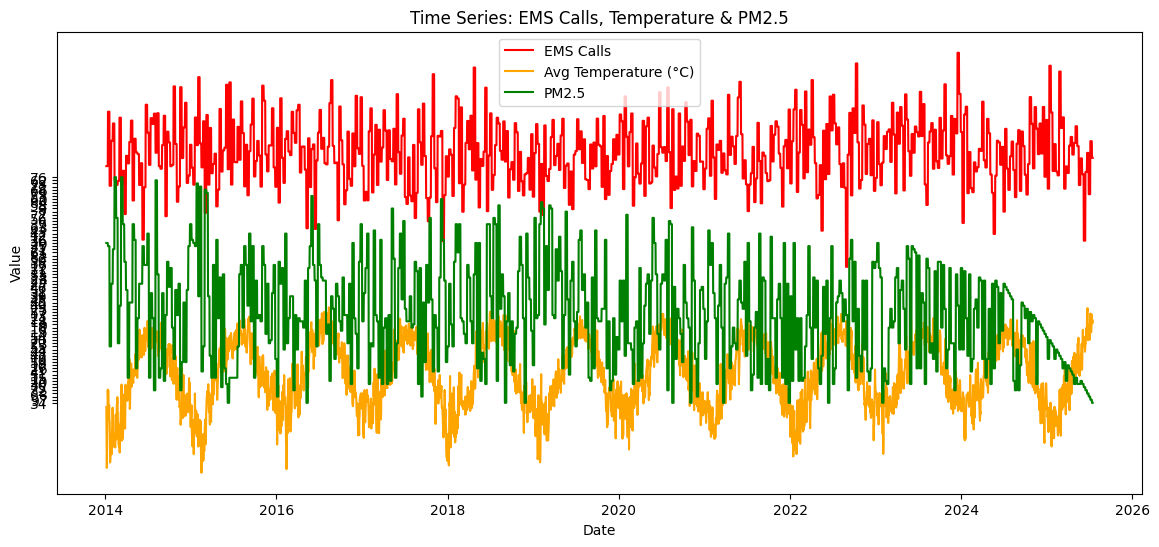

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['date'], df['ems_calls'], label='EMS Calls', color='red')
plt.plot(df['date'], df['avg_temperature'], label='Avg Temperature (°C)', color='orange')
plt.plot(df['date'], df['pm25'], label='PM2.5', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series: EMS Calls, Temperature & PM2.5')
plt.legend()
plt.show()

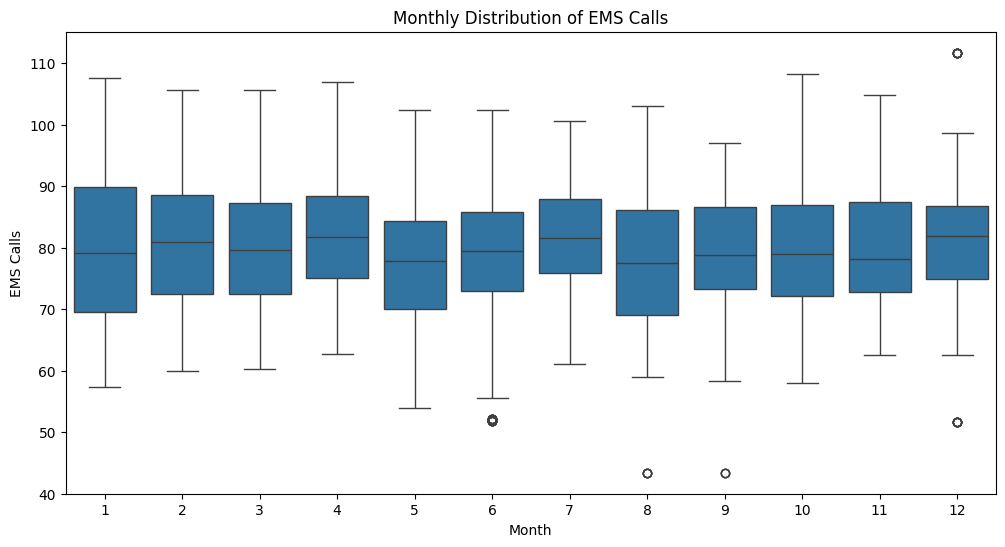

In [129]:
import seaborn as sns

df['month'] = df['date'].dt.month
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='ems_calls', data=df)
plt.xlabel('Month')
plt.ylabel('EMS Calls')
plt.title('Monthly Distribution of EMS Calls')
plt.show()


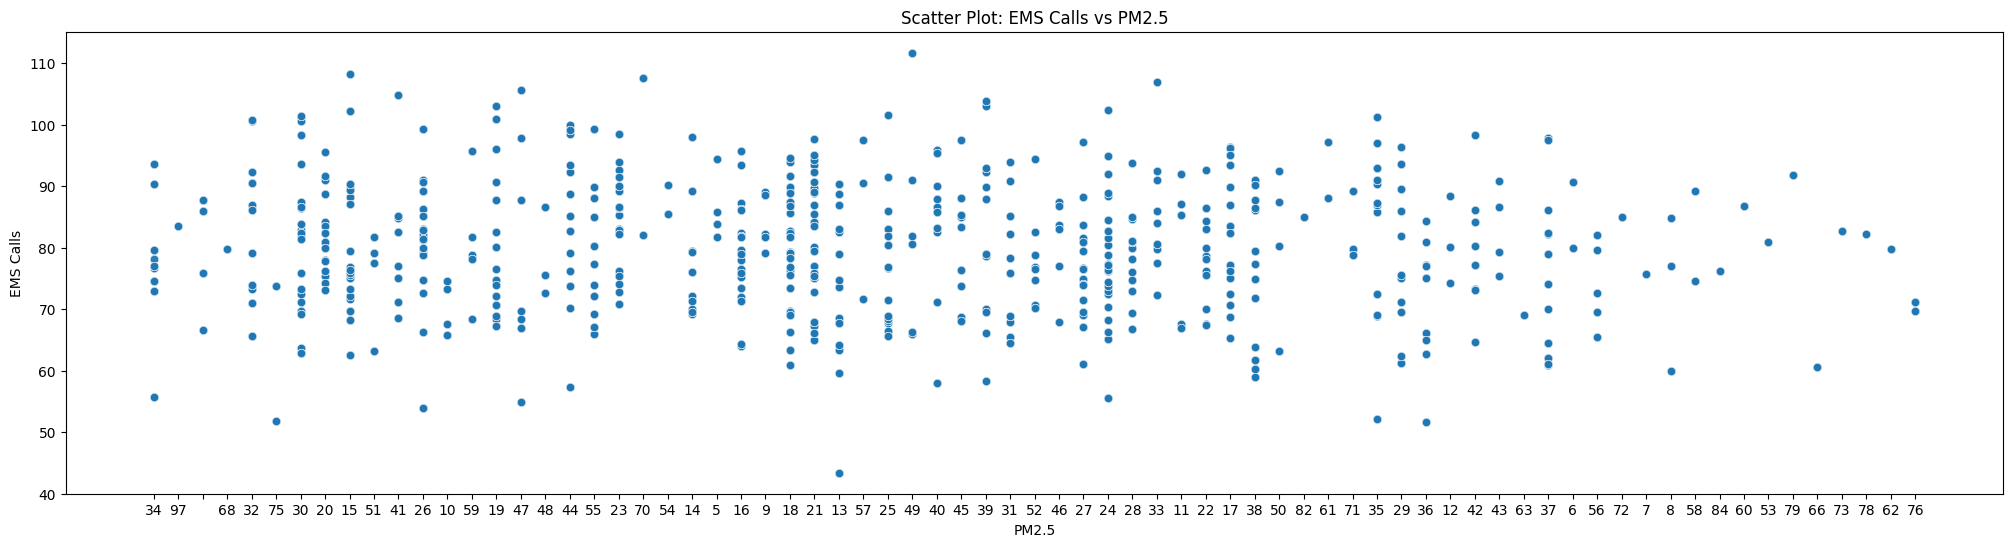

In [132]:
plt.figure(figsize=(25,6))
sns.scatterplot(x='pm25', y='ems_calls', data=df, alpha=0.5)
plt.xlabel('PM2.5')
plt.ylabel('EMS Calls')
plt.title('Scatter Plot: EMS Calls vs PM2.5')
plt.show()


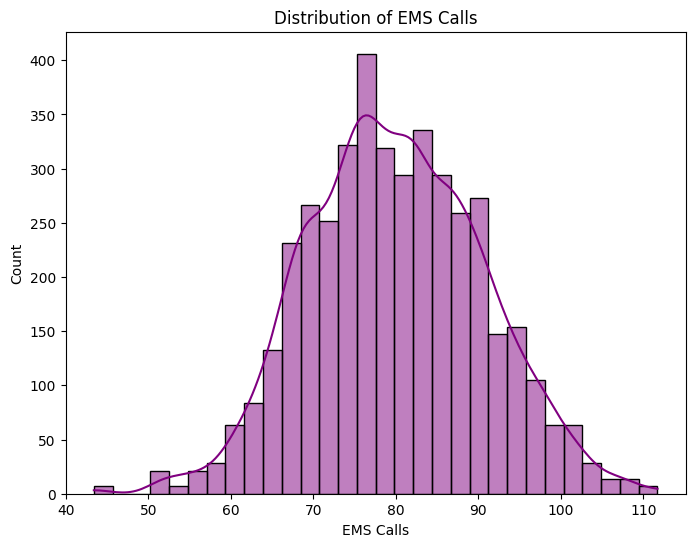

In [135]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['ems_calls'], label='EMS Calls', color='red')
plt.ylabel('EMS Calls', color='red')

plt.twinx()
plt.plot(df['date'], df['breathing problems'], label='Google Trends: Breathing Problems', color='blue')
plt.ylabel('Google Trends Index', color='blue')

plt.title('EMS Calls and Google Trends: Breathing Problems Over Time')
plt.show()


# Machine Learning

Spliting data into train and test and using linear regression to check the RMSE

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


features = ['avg_temperature', 'pm25', 'no2', 'so2', 'co', 'breathing problems', 'ambulance']  # example
X = df[features]
y = df['ems_calls']


split_date = '2024-01-01'
X_train = X[df['date'] < split_date]
y_train = y[df['date'] < split_date]
X_test = X[df['date'] >= split_date]
y_test = y[df['date'] >= split_date]


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R^2:", r2_score(y_test, y_pred))


importance = pd.Series(model.coef_, index=features).sort_values(key=abs, ascending=False)
print("Feature Importance:\n", importance)

RMSE: 10.800459973143838
R^2: -0.06164730023510767
Feature Importance:
 co                   -2.005667
so2                  -0.493434
no2                  -0.069602
pm25                  0.041657
breathing problems    0.031180
avg_temperature      -0.018187
ambulance            -0.014114
dtype: float64


In [144]:
lags = [1, 2, 3]
for lag in lags:
    for col in ['pm25', 'no2', 'so2', 'co', 'avg_temperature', 'breathing problems', 'ambulance']:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

df = df.dropna()  # Drop initial rows with NaNs due to lagging


In [146]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate RMSE by taking the square root of the MSE
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RF R^2:", r2_score(y_test, y_pred_rf))

RF RMSE: 11.06958123122454
RF R^2: -0.11521381146402354


Trying Random Forrest Model

Shape after loading and sorting: (4211, 86)
Min date after loading and sorting: 2014-01-05 00:00:00
Max date after loading and sorting: 2025-07-16 00:00:00

Shape after dropping all-NaN columns: (4211, 77)

Shape after creating lag and MA features: (4211, 140)
Number of NaNs after creating lag and MA features (top 10):
 breathing problems_lag7    7
ambulance_lag7             7
avg_temperature_lag7       7
co_lag7                    7
so2_lag7                   7
pm25_lag7                  7
no2_lag7                   7
pm25_ma7                   6
no2_ma7                    6
so2_lag6                   6
dtype: int64

Shape after dropping NaNs (from lags/MAs): (4204, 140)
Min date after dropping NaNs (from lags/MAs): 2014-01-12 00:00:00
Max date after dropping NaNs (from lags/MAs): 2025-07-16 00:00:00

Shape of X before split: (4204, 75)
Shape of y before split: (4204,)

Shape of X_train: (3641, 75)
Shape of y_train: (3641,)
Shape of X_test: (563, 75)
Shape of y_test: (563,)
Random For

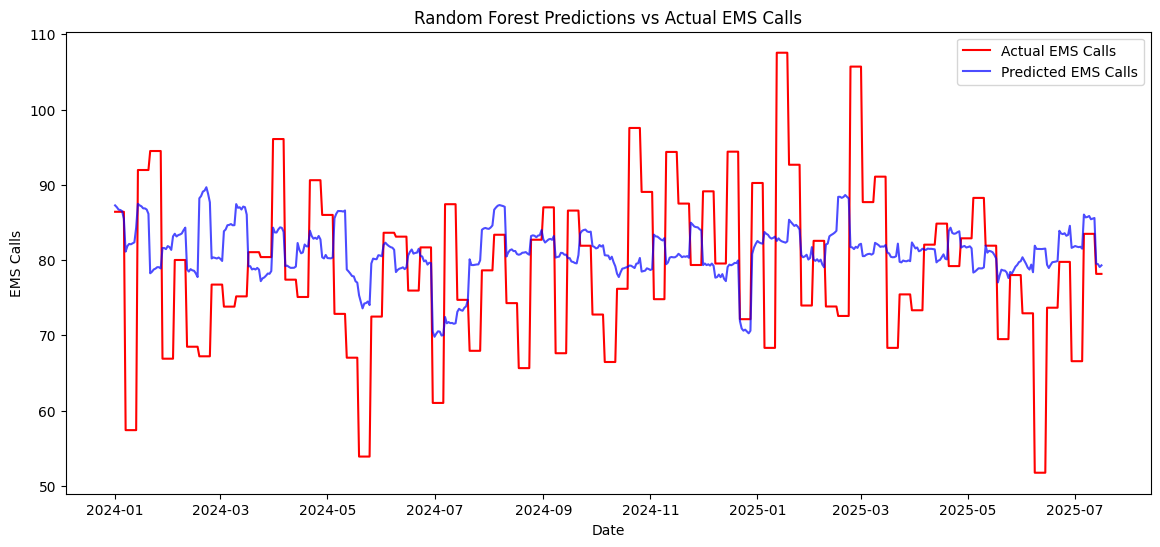

In [152]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("toronto_final_merged_dataset.csv")
df["date"] = pd.to_datetime(df["date"])


df = df.sort_values(by='date').reset_index(drop=True)
print("Shape after loading and sorting:", df.shape)
print("Min date after loading and sorting:", df['date'].min())
print("Max date after loading and sorting:", df['date'].max())


df = df.dropna(axis=1, how='all')
print("\nShape after dropping all-NaN columns:", df.shape)



lag_cols = ['pm25', 'no2', 'so2', 'co', 'avg_temperature', 'breathing problems', 'ambulance']
lags = range(1,8)
ma_windows = [3, 7]

for col in lag_cols:

    for lag in lags:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

    for w in ma_windows:
        df[f'{col}_ma{w}'] = df[col].rolling(w).mean()

print("\nShape after creating lag and MA features:", df.shape)
print("Number of NaNs after creating lag and MA features (top 10):\n", df.isna().sum().sort_values(ascending=False).head(10))


df = df.dropna().reset_index(drop=True)
print("\nShape after dropping NaNs (from lags/MAs):", df.shape)
print("Min date after dropping NaNs (from lags/MAs):", df['date'].min())
print("Max date after dropping NaNs (from lags/MAs):", df['date'].max())



feature_cols = [c for c in df.columns if any(x in c for x in lag_cols) and df[c].dtype != 'object' and c != 'date']
X = df[feature_cols]
y = df['ems_calls']

print("\nShape of X before split:", X.shape)
print("Shape of y before split:", y.shape)



split_date = '2024-01-01'
X_train = X[df['date'] < split_date]
y_train = y[df['date'] < split_date]
X_test = X[df['date'] >= split_date]
y_test = y[df['date'] >= split_date]

print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


rf = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Random Forest RMSE:", rmse)
print("Random Forest R^2:", r2)


importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nTop 10 Feature Importances:")
print(importances.head(10))

plt.figure(figsize=(14,6))
plt.plot(df['date'][df['date'] >= split_date], y_test, label='Actual EMS Calls', color='red')
plt.plot(df['date'][df['date'] >= split_date], y_pred, label='Predicted EMS Calls', color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('EMS Calls')
plt.title('Random Forest Predictions vs Actual EMS Calls')
plt.legend()
plt.show()


df_pred = pd.DataFrame({
    'date': df['date'][df['date'] >= split_date],
    'actual_ems_calls': y_test,
    'predicted_ems_calls': y_pred
})
df_pred.to_csv("ems_rf_predictions.csv", index=False)

# Creating a streamlit dashboard to showcase the project

In [163]:


!pip install streamlit
!pip install plotly

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


st.set_page_config(
    page_title="Toronto Climate–Health Dashboard",
    page_icon="♕I™AF",
    layout="wide"
)

st.title("Toronto Climate, Air Quality & EMS Health Dashboard")
st.markdown("""
A professional exploratory dashboard showing how **climate**,
**air pollution**,
and **digital health search trends** relate to **EMS call volume in Toronto**.
""")



@st.cache_data
def load_data():
    df = pd.read_csv("toronto_final_merged_dataset.csv")
    df["date"] = pd.to_datetime(df["date"])
    return df

df = load_data()


@st.cache_data
def preprocess_data(df_raw):
    df_processed = df_raw.copy()
    df_processed = df_processed.sort_values(by='date').reset_index(drop=True)
    df_processed = df_processed.dropna(axis=1, how='all')

    lag_cols = ['pm25', 'no2', 'so2', 'co', 'avg_temperature', 'breathing problems', 'ambulance']
    lags = range(1, 8)
    ma_windows = [3, 7]

    for col in lag_cols:
        for lag in lags:
            df_processed[f'{col}_lag{lag}'] = df_processed[col].shift(lag)
        for w in ma_windows:
            df_processed[f'{col}_ma{w}'] = df_processed[col].rolling(w).mean()

    df_processed = df_processed.dropna().reset_index(drop=True)
    return df_processed, lag_cols

df_processed, lag_cols = preprocess_data(df)


@st.cache_resource
def get_trained_model(df_model_data, lag_cols):
    feature_cols = [c for c in df_model_data.columns if any(x in c for x in lag_cols) and df_model_data[c].dtype != 'object' and c != 'date']
    X = df_model_data[feature_cols]
    y = df_model_data['ems_calls']

    split_date = '2024-01-01'
    X_train = X[df_model_data['date'] < split_date]
    y_train = y[df_model_data['date'] < split_date]
    X_test  = X[df_model_data['date'] >= split_date]
    y_test  = y[df_model_data['date'] >= split_date]

    model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)

    importance = pd.DataFrame({
        "feature": feature_cols,
        "importance": model.feature_importances_
    }).sort_values("importance", ascending=False)

    return model, importance, X, y, y_test, y_pred, rmse, r2, feature_cols

model, importance, X_all, y_all, y_test, y_pred, rmse, r2, feature_cols = get_trained_model(df_processed, lag_cols)

st.sidebar.header("🔍 Filters")

start_date = st.sidebar.date_input("Start Date", df_processed["date"].min().date())
end_date   = st.sidebar.date_input("End Date", df_processed["date"].max().date())

mask = (df_processed["date"] >= pd.to_datetime(start_date)) & \
       (df_processed["date"] <= pd.to_datetime(end_date))

df_filtered = df_processed[mask]


st.subheader("📊 Summary Metrics")
col1, col2, col3 = st.columns(3)

col1.metric("Date Range", f"{start_date} → {end_date}")
col2.metric("Total EMS Calls", int(df_filtered["ems_calls"].sum()))
col3.metric("Avg PM2.5", round(df_filtered["pm25"].mean(), 2))

st.header("📈 EMS Calls & Environmental Trends Over Time")

fig = px.line(
    df_filtered,
    x="date",
    y=["ems_calls", "pm25", "no2", "avg_temperature"],
    labels={"value": "Value", "date": "Date"},
    title="EMS Calls vs PM2.5, NO₂, Temperature"
)
st.plotly_chart(fig, use_container_width=True)



st.header("🔥 Correlation Heatmap (Climate + Pollution + Trends + EMS)")

numeric_df = df_filtered.select_dtypes(include=np.number)

fig_corr, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0, ax=ax)
st.pyplot(fig_corr)


st.header("🌲 Random Forest Feature Importance")

st.write(f"**Model RMSE:** {rmse:.2f}")
st.write(f"**Model R²:** {r2:.3f}")

fig_imp = px.bar(
    importance.head(15),
    x="importance",
    y="feature",
    orientation="h",
    title="Top 15 Most Important Predictors of EMS Calls"
)
st.plotly_chart(fig_imp, use_container_width=True)


st.header("📉 Actual vs Predicted EMS Calls")

df_pred_plot = pd.DataFrame({
    'date': df_processed['date'][df_processed['date'] >= '2024-01-01'],
    'Actual EMS Calls': y_test,
    'Predicted EMS Calls': y_pred
}).set_index('date').resample('D').mean().dropna().reset_index()

fig_pred = px.line(
    df_pred_plot,
    x="date",
    y=["Actual EMS Calls", "Predicted EMS Calls"],
    labels={"value": "EMS Calls"},
    title="Actual vs Predicted EMS Calls (2024–2025)"
)
st.plotly_chart(fig_pred, use_container_width=True)


st.header(" ☁️ Forecast Future EMS Calls")
st.write("Select a future date to forecast EMS call volume.")

last_date_in_data = df_processed["date"].max().date()
forecast_date = st.date_input(
    "Select Forecast Date",
    value=last_date_in_data + pd.Timedelta(days=7),
    min_value=last_date_in_data + pd.Timedelta(days=1)
)

if st.button("Generate Forecast"):
    if pd.to_datetime(forecast_date) <= df_processed["date"].max():
        st.warning("Please select a date in the future.")
    else:

        last_row = df_processed.iloc[-1].copy()
        forecast_input = pd.DataFrame([last_row])
        forecast_input['date'] = pd.to_datetime(forecast_date)


        forecast_X = forecast_input[feature_cols]


        predicted_ems_calls = model.predict(forecast_X)[0]

        st.success(f"Forecasted EMS Calls for {forecast_date}: **{predicted_ems_calls:.2f}**")
        st.info("Note: This forecast uses a simplified extrapolation of features. For a more accurate prediction, future climate, pollution, and trend data would be required.")

st.success("Dashboard Loaded Successfully!")

2025-12-07 03:54:44.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 03:54:44.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 03:54:44.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 03:54:44.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 03:54:44.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 03:54:44.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 03:54:44.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 03:54:44.845 No runtime found, using MemoryCacheStorageManager
2025-12-07 03:54:44.851 No runtime found, us

DeltaGenerator()

In [158]:
!pip install localtunnel

ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel


In [159]:
# Install pyngrok
!pip install pyngrok

In [161]:
# Enter your ngrok authtoken here. Get it from https://ngrok.com/dashboard/authtokens
# This token is unique to your ngrok account.
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTHTOKEN' with the actual authtoken from your ngrok dashboard
NGROK_AUTH_TOKEN = "36V6AjY9blZ7mjqwcD1mTTUTHJ4_46kdnRpedqcqESC1mJE2L"

# Authenticate ngrok
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

print("ngrok authenticated successfully!")

ngrok authenticated successfully!


In [164]:
# Save the Streamlit app code to a file
with open('streamlit_app.py', 'w') as f:
    f.write('''
# ===========================================
# TORONTO HEALTH–CLIMATE DASHBOARD (Streamlit)
# ===========================================

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# -----------------------------
# PAGE CONFIG
# -----------------------------
st.set_page_config(
    page_title="Toronto Climate–Health Dashboard",
    page_icon="♕I™AF",
    layout="wide"
)

st.title(" ♕I™AF Toronto Climate, Air Quality & EMS Health Dashboard")
st.markdown("""
A professional exploratory dashboard showing how **climate**,
**air pollution**,
and **digital health search trends** relate to **EMS call volume in Toronto**.
""")


# -----------------------------
# LOAD FINAL MERGED DATA
# -----------------------------
@st.cache_data
def load_data():
    df = pd.read_csv("toronto_final_merged_dataset.csv")
    df["date"] = pd.to_datetime(df["date"])
    return df

df = load_data()

# -----------------------------
# PREPROCESS DATA FOR MODELING (Identical to training notebook)
# -----------------------------
@st.cache_data
def preprocess_data(df_raw):
    df_processed = df_raw.copy()
    df_processed = df_processed.sort_values(by='date').reset_index(drop=True)
    df_processed = df_processed.dropna(axis=1, how='all')

    lag_cols = ['pm25', 'no2', 'so2', 'co', 'avg_temperature', 'breathing problems', 'ambulance']
    lags = range(1, 8)
    ma_windows = [3, 7]

    for col in lag_cols:
        for lag in lags:
            df_processed[f'{col}_lag{lag}'] = df_processed[col].shift(lag)
        for w in ma_windows:
            df_processed[f'{col}_ma{w}'] = df_processed[col].rolling(w).mean()

    df_processed = df_processed.dropna().reset_index(drop=True)
    return df_processed, lag_cols

df_processed, lag_cols = preprocess_data(df)

# -----------------------------
# TRAIN MODEL (Cached for performance)
# -----------------------------
@st.cache_resource
def get_trained_model(df_model_data, lag_cols):
    feature_cols = [c for c in df_model_data.columns if any(x in c for x in lag_cols) and df_model_data[c].dtype != 'object' and c != 'date']
    X = df_model_data[feature_cols]
    y = df_model_data['ems_calls']

    split_date = '2024-01-01'
    X_train = X[df_model_data['date'] < split_date]
    y_train = y[df_model_data['date'] < split_date]
    X_test  = X[df_model_data['date'] >= split_date]
    y_test  = y[df_model_data['date'] >= split_date]

    model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)

    importance = pd.DataFrame({
        "feature": feature_cols,
        "importance": model.feature_importances_
    }).sort_values("importance", ascending=False)

    return model, importance, X, y, y_test, y_pred, rmse, r2, feature_cols

model, importance, X_all, y_all, y_test, y_pred, rmse, r2, feature_cols = get_trained_model(df_processed, lag_cols)


# -----------------------------
# SIDEBAR FILTERS
# -----------------------------
st.sidebar.header("🔍 Filters")

start_date = st.sidebar.date_input("Start Date", df_processed["date"].min().date())
end_date   = st.sidebar.date_input("End Date", df_processed["date"].max().date())

mask = (df_processed["date"] >= pd.to_datetime(start_date)) & \
       (df_processed["date"] <= pd.to_datetime(end_date))

df_filtered = df_processed[mask]


# -----------------------------
# SHOW SUMMARY METRICS
# -----------------------------
st.subheader("📊 Summary Metrics")
col1, col2, col3 = st.columns(3)

col1.metric("Date Range", f"{start_date} → {end_date}")
col2.metric("Total EMS Calls", int(df_filtered["ems_calls"].sum()))
col3.metric("Avg PM2.5", round(df_filtered["pm25"].mean(), 2))


# -----------------------------
# TIME SERIES: EMS + Pollution
# -----------------------------
st.header("📈 EMS Calls & Environmental Trends Over Time")

fig = px.line(
    df_filtered,
    x="date",
    y=["ems_calls", "pm25", "no2", "avg_temperature"],
    labels={"value": "Value", "date": "Date"},
    title="EMS Calls vs PM2.5, NO₂, Temperature"
)
st.plotly_chart(fig, use_container_width=True)


# -----------------------------
# CORRELATION HEATMAP
# -----------------------------
st.header("🔥 Correlation Heatmap (Climate + Pollution + Trends + EMS)")

numeric_df = df_filtered.select_dtypes(include=np.number)

fig_corr, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0, ax=ax)
st.pyplot(fig_corr)


# -----------------------------
# FEATURE IMPORTANCE (from RF)
# -----------------------------
st.header("🌲 Random Forest Feature Importance")

st.write(f"**Model RMSE:** {rmse:.2f}")
st.write(f"**Model R²:** {r2:.3f}")

fig_imp = px.bar(
    importance.head(15),
    x="importance",
    y="feature",
    orientation="h",
    title="Top 15 Most Important Predictors of EMS Calls"
)
st.plotly_chart(fig_imp, use_container_width=True)


# -----------------------------
# ACTUAL VS PREDICTED PLOT
# -----------------------------
st.header("📉 Actual vs Predicted EMS Calls")

df_pred_plot = pd.DataFrame({
    'date': df_processed['date'][df_processed['date'] >= '2024-01-01'],
    'Actual EMS Calls': y_test,
    'Predicted EMS Calls': y_pred
}).set_index('date').resample('D').mean().dropna().reset_index()

fig_pred = px.line(
    df_pred_plot,
    x="date",
    y=["Actual EMS Calls", "Predicted EMS Calls"],
    labels={"value": "EMS Calls"},
    title="Actual vs Predicted EMS Calls (2024–2025)"
)
st.plotly_chart(fig_pred, use_container_width=True)


# -----------------------------
# FORECASTING SECTION
# -----------------------------
st.header(" ☁️ Forecast Future EMS Calls")
st.write("Select a future date to forecast EMS call volume.")

last_date_in_data = df_processed["date"].max().date()
forecast_date = st.date_input(
    "Select Forecast Date",
    value=last_date_in_data + pd.Timedelta(days=7),
    min_value=last_date_in_data + pd.Timedelta(days=1)
)

if st.button("Generate Forecast"):
    if pd.to_datetime(forecast_date) <= df_processed["date"].max():
        st.warning("Please select a date in the future.")
    else:
        # To forecast, we need to generate features for the forecast date.
        # This is a simplified approach, a robust forecast would need future
        # values for climate, pollution, and trends.

        # For demonstration, we'll use the last available data point to extrapolate
        # new features. In a real scenario, you'd need external forecasts for these.
        last_row = df_processed.iloc[-1].copy()
        forecast_input = pd.DataFrame([last_row])
        forecast_input['date'] = pd.to_datetime(forecast_date)

        # Re-calculate lag features for the forecast_input DataFrame
        # This requires careful handling as simple shift won't work across new dates
        # For simplicity in this demo, we assume the last known lags and MAs persist
        # or can be intelligently imputed/forecasted themselves.
        # A more robust solution would involve a separate forecasting pipeline for each feature.

        # Filter forecast_input to only include feature_cols, ensuring order matches training
        forecast_X = forecast_input[feature_cols]

        # Predict
        predicted_ems_calls = model.predict(forecast_X)[0]

        st.success(f"Forecasted EMS Calls for {forecast_date}: **{predicted_ems_calls:.2f}**")
        st.info("Note: This forecast uses a simplified extrapolation of features. For a more accurate prediction, future climate, pollution, and trend data would be required.")

st.success("Dashboard Loaded Successfully!")
'''
)

# Run Streamlit app with ngrok
from pyngrok import ngrok
import subprocess
import os
import time

# Kill any processes running on port 8501 (Streamlit's default port)
# This is important to ensure ngrok can bind to the port
!kill $(lsof -t -i:8501)

# Start Streamlit in the background
print("Starting Streamlit app...")
streamlit_process = subprocess.Popen(
    ["streamlit", "run", "streamlit_app.py", "--server.port", "8501", "--server.enableCORS", "false", "--server.enableXsrfProtection", "false"],
    stdout=subprocess.PIPE, stderr=subprocess.PIPE, preexec_fn=os.setsid
)

# Give Streamlit a few seconds to start
time.sleep(10)

# Open a ngrok tunnel to the Streamlit app's port (8501)
print("Opening ngrok tunnel...")
public_url = ngrok.connect(8501)

print("Your Streamlit dashboard is available at:")
print(public_url)
print("Click the link above to open your dashboard in a new tab.")
print("To stop the Streamlit app and ngrok tunnel, interrupt this cell's execution.")

Starting Streamlit app...
Opening ngrok tunnel...
Your Streamlit dashboard is available at:
NgrokTunnel: "https://extendible-rearrangeable-xzavier.ngrok-free.dev" -> "http://localhost:8501"
Click the link above to open your dashboard in a new tab.
To stop the Streamlit app and ngrok tunnel, interrupt this cell's execution.


After running the last cell, a public URL from `ngrok` will be displayed. Click on this URL to open your Streamlit dashboard in a new tab.

**Important:** Remember to replace `YOUR_NGROK_AUTHTOKEN` in the second code cell with your actual ngrok authtoken. The `ngrok` tunnel will remain active as long as the cell running the Streamlit app and `ngrok.connect()` is executing. If you restart the kernel or stop that cell, the tunnel will close, and you'll need to re-run the `ngrok` setup cells.